In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries
import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load Data
image_names=[]
output=[]
labels=[]
benign = 0
malignant = 0
# Define Classes
classes={'benign':0,"malignant":1}
for name in classes:
    address='/content/drive/MyDrive/ultrasound_breast_classification/train/'+name
    for add in os.listdir(address):
            image = cv2.imread(address+'/'+add)
            image = cv2.normalize(image, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype =cv2.CV_8U)
            image_names.append(image)
            output.append(classes[name])
            if classes[name] == 0:
                benign = benign+1
            if classes[name] == 1:
                malignant = malignant + 1
            labels.append(name)

In [ ]:
# Number of images
print("Benign Images :",benign)
print("Malignant Images :",malignant)
print("length of data =",len(image_names), "files=", len(output), "labels=",len(labels))

Benign Images : 3716
Malignant Images : 4442
length of data = 8158 files= 8158 labels= 8158


In [ ]:
# plot the bar graph for number of benign and malignant images
fig = plt.figure(figsize = (10, 5))
k1=0
k2=0
for i in range (0,8152):
    if output[i]==0:
        k1+=1
    else:
        k2+=1
plt.bar([0,1],[k1,k2], color = ['g','m'])
plt.xticks([0,1], ['Beningn', 'Malignant'])
plt.ylabel("No. of Images")
plt.title("Bar Plot")
plt.show()

In [ ]:
## function to plot sample images
def sample_images(images,gray = False):
    figure, axes = plt.subplots(1, 4)
    figure.set_size_inches(35,25)
    axes[0].imshow(images[1],cmap='gray') if gray else axes[0].imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))
    axes[0].title.set_text("Benign")
    axes[0].axis('off')
    axes[1].imshow(images[55],cmap='gray') if gray else axes[1].imshow(cv2.cvtColor(images[55], cv2.COLOR_BGR2RGB))
    axes[1].title.set_text("Benign")
    axes[1].axis('off')
    axes[2].imshow(images[450],cmap='gray') if gray else axes[2].imshow(cv2.cvtColor(images[450], cv2.COLOR_BGR2RGB))
    axes[2].axis('off')
    axes[2].title.set_text("Malignant")
    axes[3].imshow(images[451],cmap='gray') if gray else axes[3].imshow(cv2.cvtColor(images[451], cv2.COLOR_BGR2RGB))
    axes[3].axis('off')
    axes[3].title.set_text("Malignant")
    plt.show()

In [ ]:
# Look for image shape and type of input images
input_images = image_names
print(np.array(input_images).shape)
print(input_images[10].dtype)

(8158,)
uint8


<ipython-input-7-e685cd50076c>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(input_images).shape)


In [ ]:
# Plot the sample images
sample_images(input_images)

8158


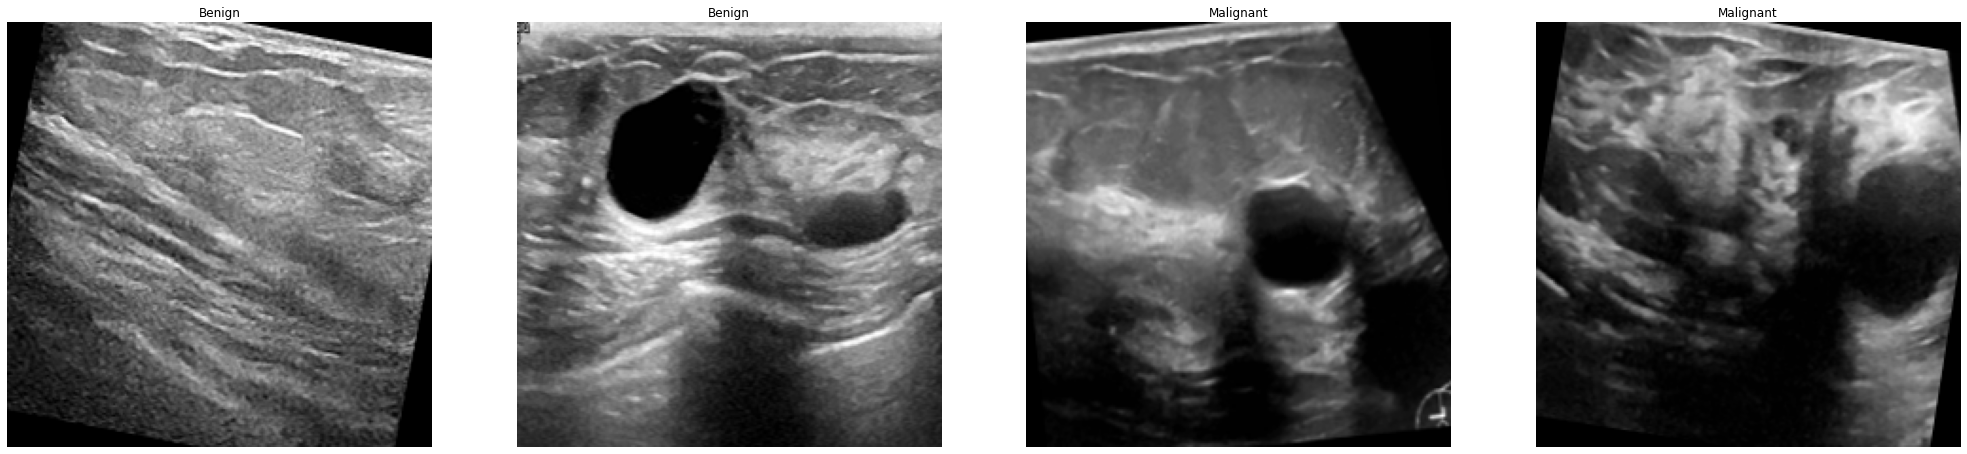

In [ ]:
# Convert the RGB images to gray scale images
grayscale_images = []
grayscale_images.clear()
for idx, image in enumerate(input_images,1):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    grayscale_images.append(gray_image)
print(idx)
sample_images(grayscale_images)

In [ ]:
# histogram equalization on gray scale images
eqhist_images=[]
eqhist_images.clear()
for idx, image in enumerate(grayscale_images):
    eqhistimage = cv2.equalizeHist(image)
    eqhist_images.append(eqhistimage)
sample_images(eqhist_images, True)

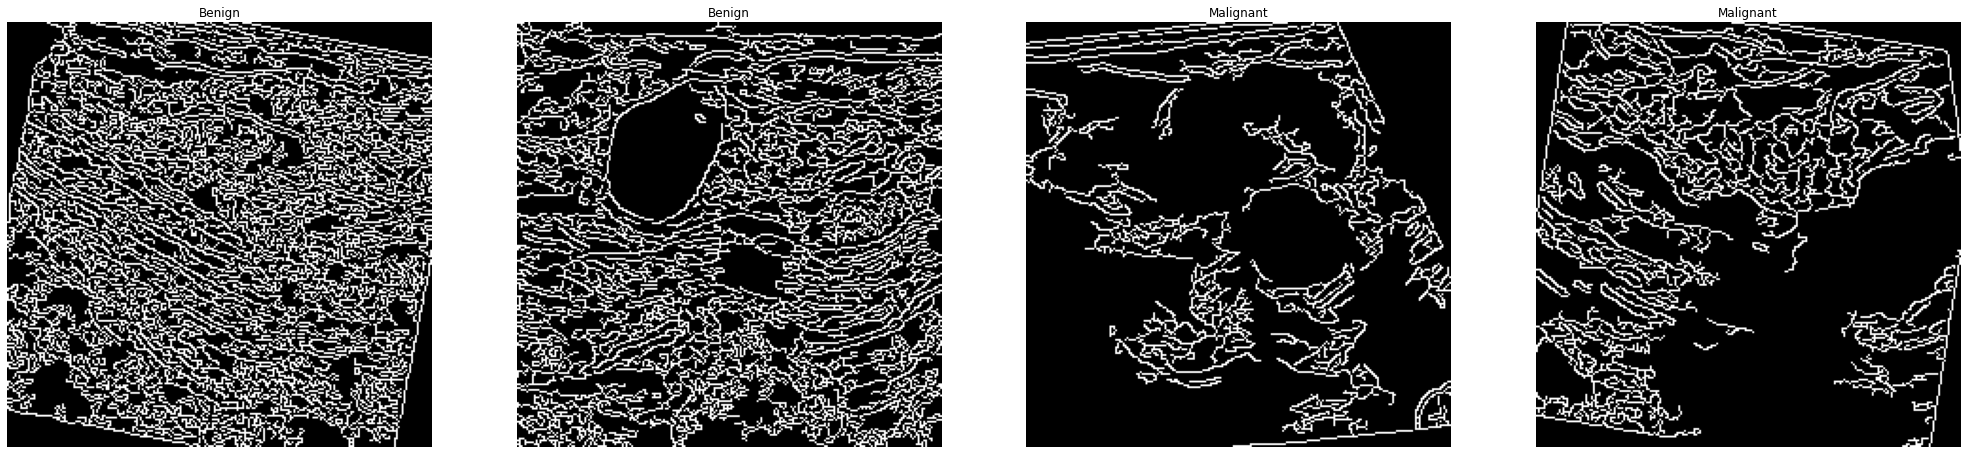

In [ ]:
# canny edge detection
canny_edged_images=[]
canny_edged_images.clear()
for idx, image in enumerate(input_images):
    image = cv2.Canny(image,10,200)
    canny_edged_images.append(image)
sample_images(canny_edged_images, True)

In [ ]:
# GLCM Features

Energy = [];Correlation = [];Dissimilarity = [];Homogenity = [];Contrast = [];Entropy = []

from skimage.feature import graycomatrix, graycoprops
def energy(img):
            img = np.array(img)
            GLCM = graycomatrix(img, [1], [0])
            return graycoprops(GLCM, 'energy')[0]
def correlation(img):
            img = np.array(img)
            GLCM = graycomatrix(img, [1], [0])
            return graycoprops(GLCM, 'correlation')[0]
def dissimilarity(img):
            img = np.array(img)
            GLCM = graycomatrix(img, [1], [0])
            return  graycoprops(GLCM, 'dissimilarity')[0]
def homogenity(img):
            img = np.array(img)
            GLCM = graycomatrix(img, [1], [0])
            return  graycoprops(GLCM, 'homogeneity')[0]
def contrast(img):
            img = np.array(img)
            GLCM = graycomatrix(img, [1], [0])
            return graycoprops(GLCM, 'contrast')[0]
def entropy(img):
            img = np.array(img)
            GLCM = graycomatrix(img, [1], [0])
            return graycoprops(GLCM, 'entropy')[0]
for img in input_images:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    Energy.append(energy(img)[0])
    Correlation.append(correlation(img)[0])
    Dissimilarity.append(dissimilarity(img)[0])
    Homogenity.append(homogenity(img)[0])
    Contrast.append(contrast(img)[0])
    Entropy.append(contrast(img)[0])

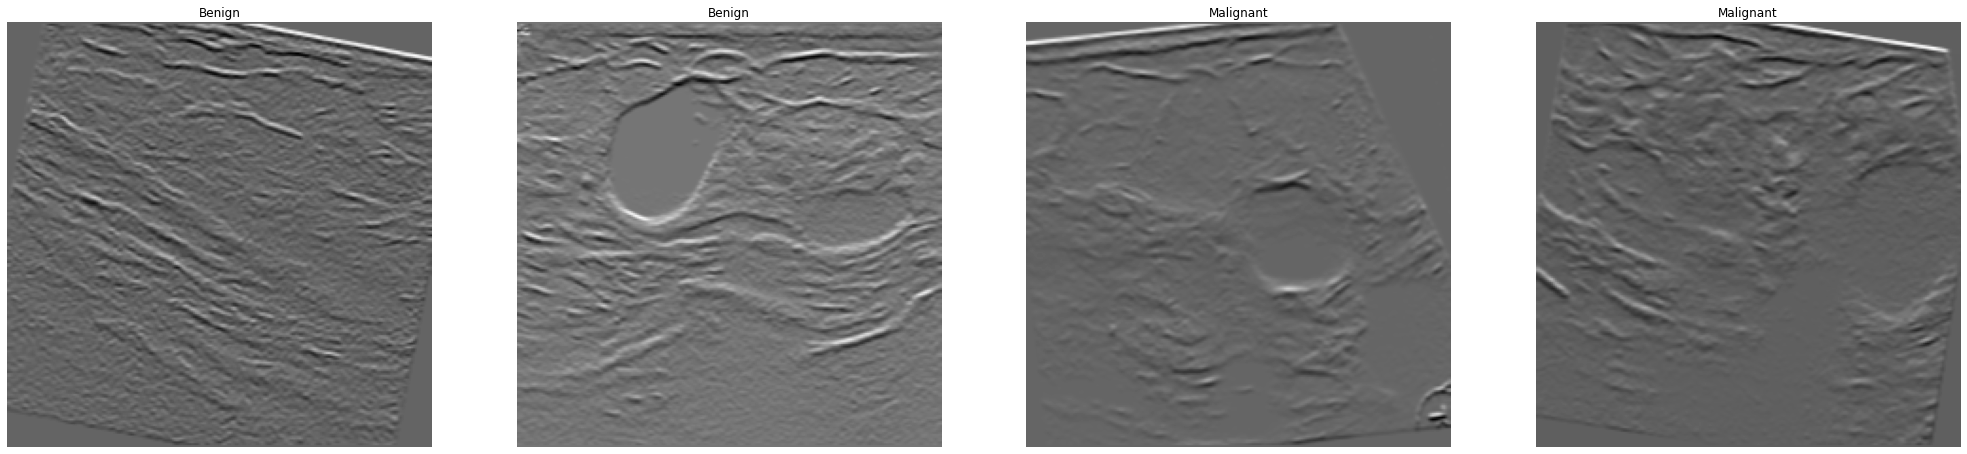

In [ ]:
# Sobel on  grayscale
sobel_images_x=[]
sobel_images_x.clear()
sobel_images_y=[]
sobel_images_y.clear()
for image in (grayscale_images):
  sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
  sobel_images_x.append(sobel_x)
  sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
  sobel_images_y.append(sobel_y)
sample_images(sobel_images_x, True)
sample_images(sobel_images_y, True)

In [ ]:
# Bilateral
bi_images=[]
bi_images.clear()
for idx, image in enumerate(grayscale_images):
    biimage = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
    bi_images.append(biimage)
sample_images(bi_images, True)

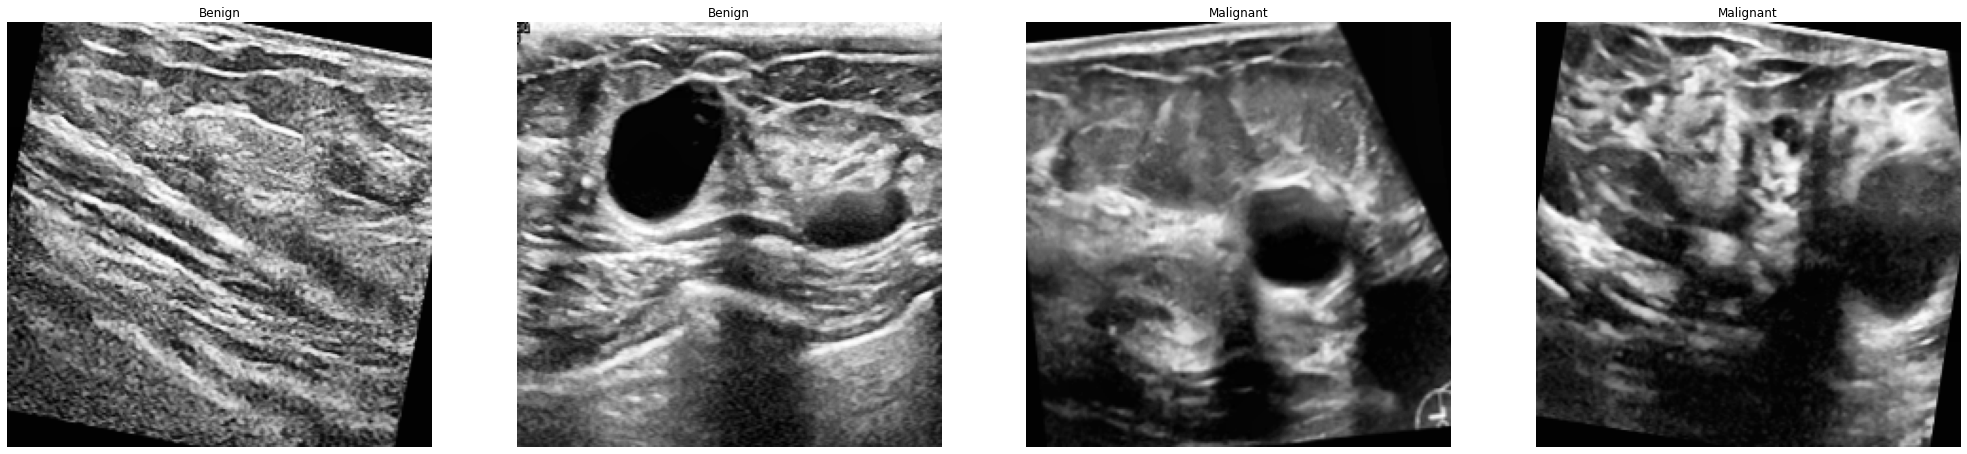

In [ ]:
# CLAHE
cl_images=[]
cl_images.clear()
for idx, image in enumerate(grayscale_images):
    # Create a CLAHE object with desired parameters --> check about changing these
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    # Apply the CLAHE function
    climage = clahe.apply(image)
    cl_images.append(climage)
sample_images(cl_images, True)

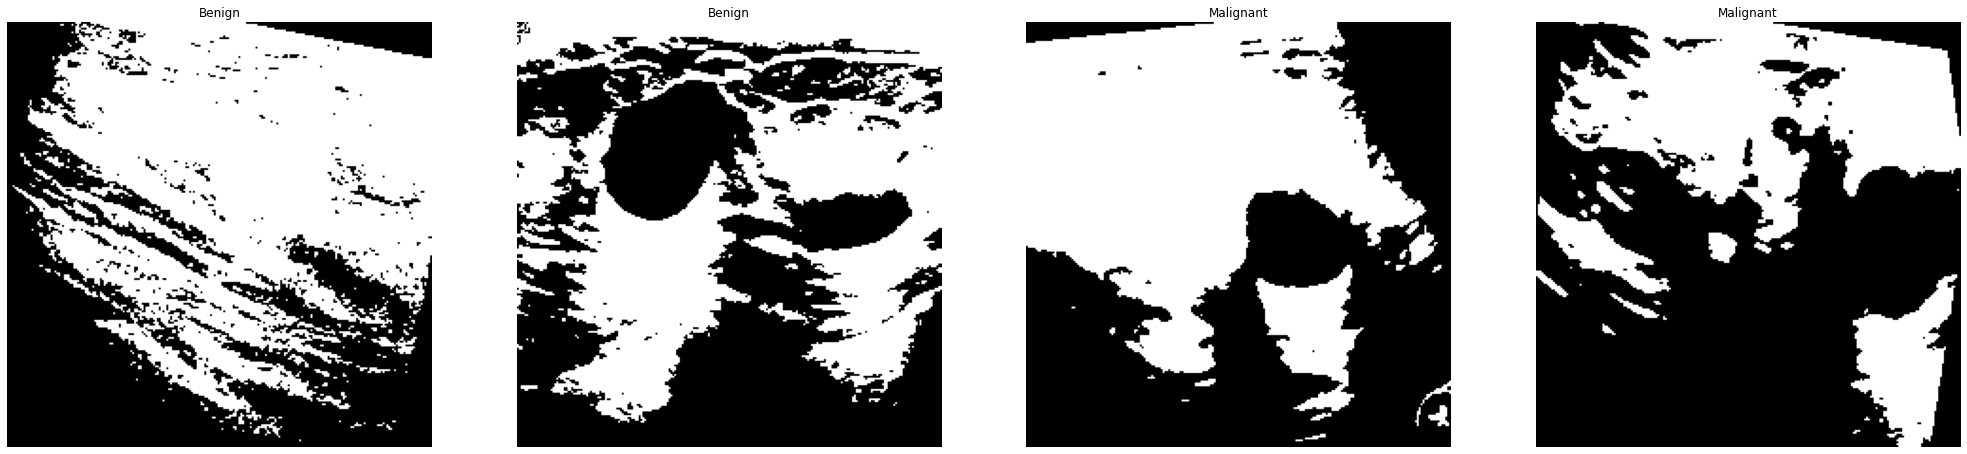

In [ ]:
# Otsu
ot_images=[]
ot_images.clear()
for idx, image in enumerate(grayscale_images):
  ret, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  ot_images.append(thresh)
sample_images(ot_images, True)

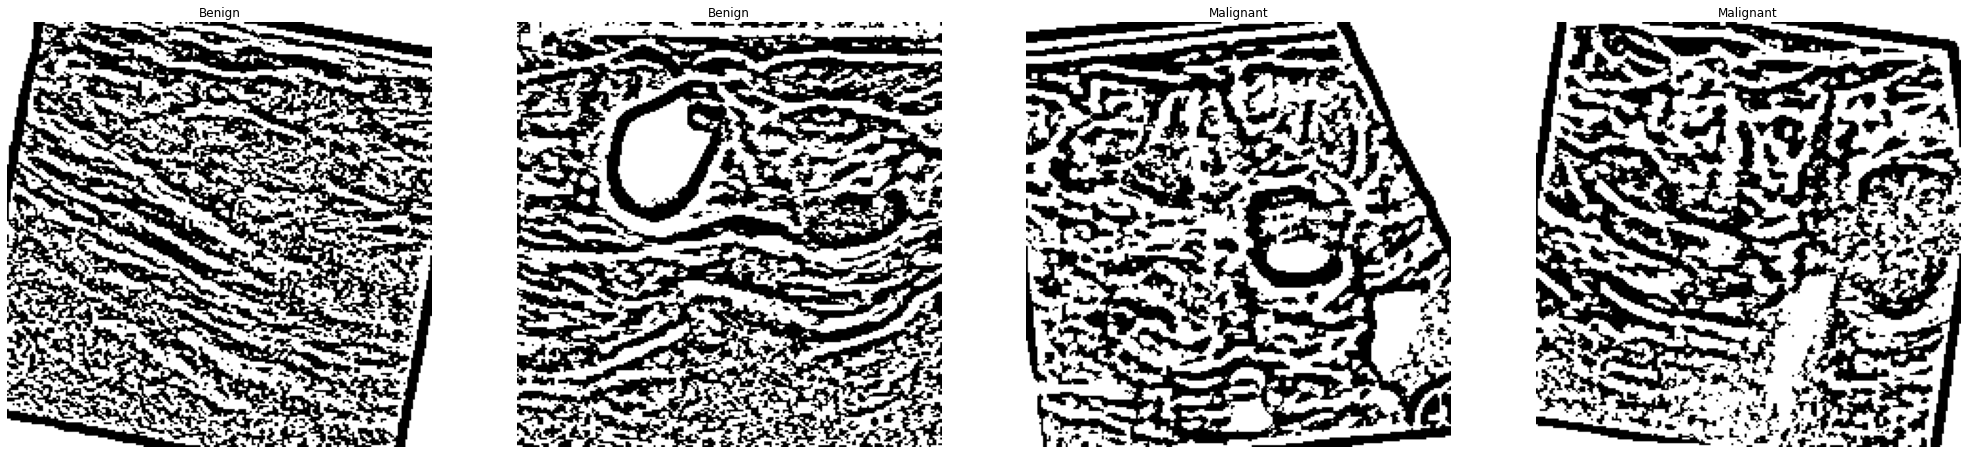

In [ ]:
# Adaptive
ad_images=[]
ad_images.clear()
for idx, image in enumerate(grayscale_images):
  thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
  ad_images.append(thresh)
sample_images(ad_images, True)

In [ ]:
# Calculating Features

In [ ]:
## mean and standard deviation of grayscale images
gray_mean=[]
gray_std_dev=[]
gray_mean.clear()
gray_std_dev.clear()
for idx, image in enumerate(grayscale_images):
    mean = np.mean(image)
    std_dev = np.std(image)
    gray_mean.append(mean)
    gray_std_dev.append(std_dev)

In [ ]:
## calculating mean and standard deviation of histogram equalization images
Histeq_mean=[]
Histeq_std=[]
Histeq_mean.clear()
Histeq_std.clear()
for image in eqhist_images:
    Histeq_mean.append(np.mean(image))
    Histeq_std.append(np.std(image))

In [ ]:
## mean and standard deviation of clahe images
clahe_mean=[]
clahe_std_dev=[]
clahe_mean.clear()
clahe_std_dev.clear()
for idx, image in enumerate(cl_images):
    mean = np.mean(image)
    std_dev = np.std(image)
    clahe_mean.append(mean)
    clahe_std_dev.append(std_dev)

In [ ]:
## mean and standard deviation of sobel images
sobel_meanx=[]
sobel_std_devx=[]
sobel_meanx.clear()
sobel_std_devx.clear()
for idx, image in enumerate(sobel_images_x):
    mean = np.mean(image)
    std_dev = np.std(image)
    sobel_meanx.append(mean)
    sobel_std_devx.append(std_dev)

In [ ]:
## mean and standard deviation of sobel images
sobel_meany=[]
sobel_std_devy=[]
sobel_meany.clear()
sobel_std_devy.clear()
for idx, image in enumerate(sobel_images_y):
    mean = np.mean(image)
    std_dev = np.std(image)
    sobel_meany.append(mean)
    sobel_std_devy.append(std_dev)

In [ ]:
## mean and standard deviation of adaptive histogram equalization images
adaptive_mean=[]
adaptive_std_dev=[]
adaptive_mean.clear()
adaptive_std_dev.clear()
for idx, image in enumerate(ad_images):
    mean = np.mean(image)
    std_dev = np.std(image)
    adaptive_mean.append(mean)
    adaptive_std_dev.append(std_dev)

In [ ]:
## calculating mean and standard deviation of bilateral images
bi_mean=[]
bi_std=[]
bi_mean.clear()
bi_std.clear()
for image in bi_images:
    bi_mean.append(np.mean(image))
    bi_std.append(np.std(image))

In [ ]:
## calculating mean and standard deviation of otsu images
otsu_mean=[]
otsu_std=[]
otsu_mean.clear()
otsu_std.clear()
for image in eqhist_images:
    otsu_mean.append(np.mean(image))
    otsu_std.append(np.std(image))

In [ ]:
## calculating mean and standard deviation of canny images
canny_mean=[]
canny_std=[]
canny_mean.clear()
canny_std.clear()
for image in canny_edged_images:
    canny_mean.append(np.mean(image))
    canny_std.append(np.std(image))

In [ ]:
a = pd.DataFrame({'gray_mean':gray_mean})
b = pd.DataFrame({'gray_std_dev':gray_std_dev})
c = pd.DataFrame({'Histeq_mean':Histeq_mean})
d = pd.DataFrame({'Histeq_std':Histeq_std})
e = pd.DataFrame({'clahe_mean':clahe_mean})
f = pd.DataFrame({'clahe_std_dev':clahe_std_dev})
g = pd.DataFrame({'sobel_meanx':sobel_meanx})
h = pd.DataFrame({'sobel_std_devx':sobel_std_devx})
i = pd.DataFrame({'sobel_meany':sobel_meany})
j = pd.DataFrame({'sobel_std_devy':sobel_std_devy})
k = pd.DataFrame({'adaptive_mean':adaptive_mean})
l = pd.DataFrame({'adaptive_std_dev':adaptive_std_dev})
m = pd.DataFrame({'bi_mean':bi_mean})
n = pd.DataFrame({'bi_std':bi_std})
o = pd.DataFrame({'otsu_mean':otsu_mean})
p = pd.DataFrame({'otsu_std':otsu_std})
q = pd.DataFrame({'canny_mean':canny_mean})
r = pd.DataFrame({'canny_std':canny_std})
s = pd.DataFrame({'Entropy':Entropy})
t = pd.DataFrame({'Energy':Energy})
u = pd.DataFrame({'Correlation':Correlation})
v = pd.DataFrame({' Dissimilarity': Dissimilarity})
w = pd.DataFrame({'Homogenity':Homogenity})
x = pd.DataFrame({'Contrast':Contrast})
y = pd.DataFrame({'label':output})

In [ ]:
# Make a list of all features aand concenate it.
pdList = [a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y]
data = pd.concat(pdList,axis=1)

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.to_csv('breast_ultrasound_texture_features.csv')

In [ ]:
# K-fold cross validation along with SVM, DT,KNN, etc